In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

To start this project, I have loaded all the necessary packages above to be used for this project. 

Next, I will read the 2 CSV data files, 'players.csv' and 'sessions.csv' onto this project so we can see what we're working with.

In [2]:
players <- read_csv('players.csv')
sessions <- read_csv('sessions.csv')
players



sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


<!-- (1) Data Description:
Provide a full descriptive summary of the dataset, summary statistics (report values to 2 decimal places), any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.


<!--  -->
After loading both data files, we can summarize their contents. The first dataset, players.csv, lists unique players recorded during the data collection period, while the second dataset, sessions.csv, logs every game session initiated by these players. For the players dataset, there are 196 rows, each representing one of the 196 unique players. 

There are also 7 columns within this dataset. 
- The first column 'experience', classifies each player's relative experience, under either 'Beginner', 'Amateur', 'Regular', 'Pro', or 'Veteran'.

 - The 'subscribe' column is a logical vector, meaning it gives every player a value of either 'TRUE' or 'FALSE' under this column. This column represents whether or not the player is subscribed to a game-related newsletter.

 - The 'hashedEmail' column provides the hashed email of each player, giving a unique identifier key for each player.

 - The 'played_hours' column provides a numerical value, equating to the total number of hours each player has played on the server. The average hours played per person is 5.85 hours

 - The 'name' column provides the name of each player

 - The 'gender' column provides the gender of each player (Male/Female/Other/Prefer not to say/etc...)

 - The 'Age' column provides the numerical age of each player. The average age throughout the dataset is 21.14 years old.



The second dataset, 'sessions.csv' has 1535 rows, representing 1535 sessions. 

There are also 5 columns within this dataset. 
 - The 'hashedEmail' column provides the hashed email of each player, allowing us to know which player is associated with that session.
   
 - The 'start_time' column provides the time and date the player started the session.

 - The 'end_time' column provides the time and date the player ended the session.

 - The 'original_start_time' column provides the start time of the session in Unix timestamp format (milliseconds since January 1, 1970), allowing for precise time calculations and sorting.

 - The 'original_end_time' column provides the end time of the session in Unix timestamp format, which can be used to accurately calculate the session’s duration.



Overall, for the 'players' dataset, it appears to be clean but contains a few issues worth noting. The Age column has missing values that would need to be addressed through imputation or removal. The name variable  may not provide analytical value beyond labeling, especially considering hashedEmail provides a unique identifier. Additionally, there is no indication of the timeframe over which played_hours were accumulated, which limits interpretability. Beyond visible issues, potential hidden concerns include sampling bias, as the dataset may not represent the entire player population (given the high proportion of subscribers). The reliability of self-reported measures is also uncertain—if played_hours were not automatically logged, they could be inaccurate. Lastly, since there are no date or location variables, it is impossible to assess temporal or regional trends in player behavior. Despite these limitations, the dataset offers a solid foundation for examining how experience, age, gender, and subscription status influence player engagement.


For the 'sessions' dataset, In terms of data quality, the dataset is generally consistent but exhibits a few potential issues. First, there are two missing end_time values that could distort calculations of total playtime if not handled properly. Second, because timestamps are stored in two formats, duplication of information may be redundant, though useful for different types of analysis. There is no explicit measure of duration, so it must be derived by subtracting original_start_time from original_end_time. Another limitation is the absence of more specific information such as location, device type, or session purpose, which restricts further potential analysis. Despite these issues, the dataset provides a strong foundation for exploring player engagement, frequency, and duration of play. When combined with players.csv, it can reveal how factors like experience level, age, or subscription status influence overall session behavior and time investment.

We chose question #1 as our broad question, which asks which player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how these features differ between various player types. More specifically, we ask: Can a player’s experience level, age, gender, and total playtime predict whether or not they subscribe to the newsletter? To address this question, we will use the players.csv dataset, which contains information about each player’s demographic and behavioural attributes, including their experience, subscription status, gender, age, and total hours played. The response variable of interest will be the 'subscribe' variable, while the explanatory variables will include experience, age, gender, and played_hours. Before analysis, we will clean the data by checking for missing or inconsistent values (e.g., in age or gender) and ensuring that categorical variables such as experience are properly ordered. We will then apply the k-NN classification method, to determine which player traits are most associated with subscribing. This analysis will help identify the characteristics of players who are most engaged with the game community and most likely to opt into further communication or marketing.

I will now wrangle the data to prepare it for the analysis, as well as make a few exploratory visualizations of the data to help me understand it.

In [15]:


players <- players |>
  mutate(
    experience = as.factor(experience),
    gender = as.factor(gender))

players_wrangled <- players |>
    rename(
        age = Age,
        hashed_email = hashedEmail)

players_mean <- players_wrangled |>
    summarise(across(c(played_hours, age), ~ mean(.x, na.rm = TRUE)))


players_wrangled
players_mean

experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


played_hours,age
<dbl>,<dbl>
5.845918,21.13918


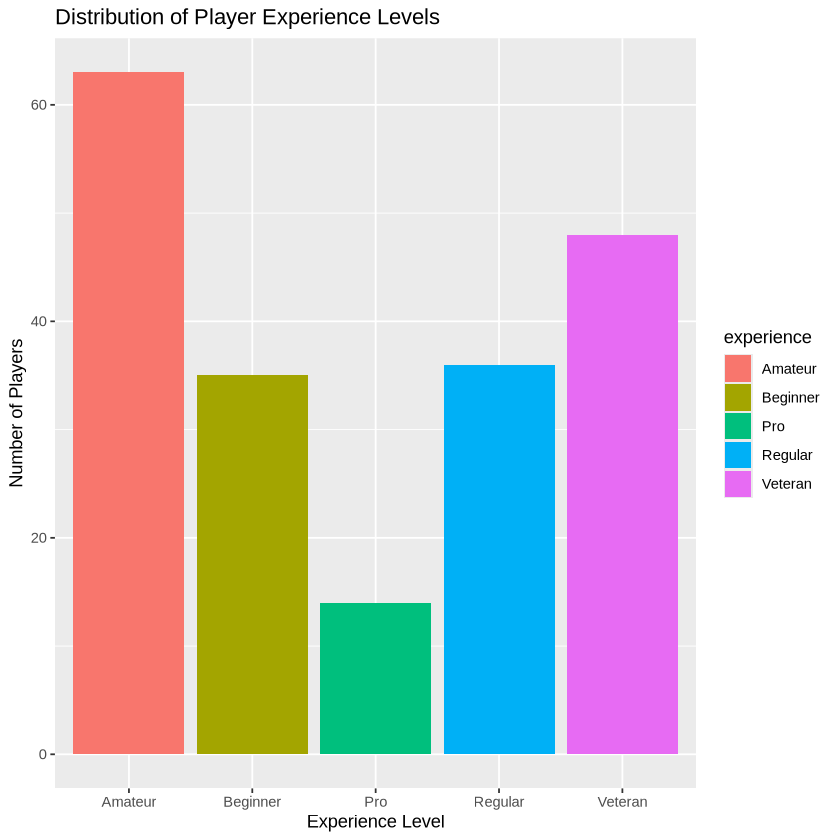

In [6]:
experience_plot <- players_wrangled |>
ggplot(aes(x = experience, fill = experience)) +
  geom_bar() +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Number of Players"
  )
experience_plot

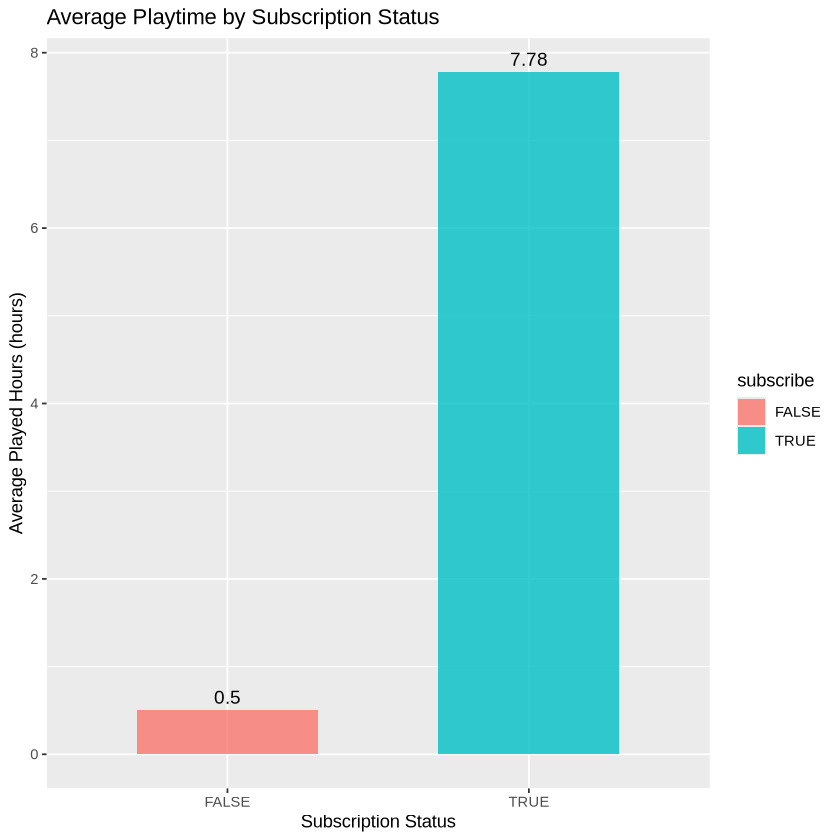

In [13]:
subscribed_summarised <- players_wrangled |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

subscribed_plot <- subscribed_summarised |>  

ggplot(aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_col(width = 0.6, alpha = 0.8) +
  geom_text(aes(label = round(mean_hours, 2)), vjust = -0.5, size = 4) +
  labs(
    title = "Average Playtime by Subscription Status",
    x = "Subscription Status",
    y = "Average Played Hours (hours)"
  )
subscribed_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


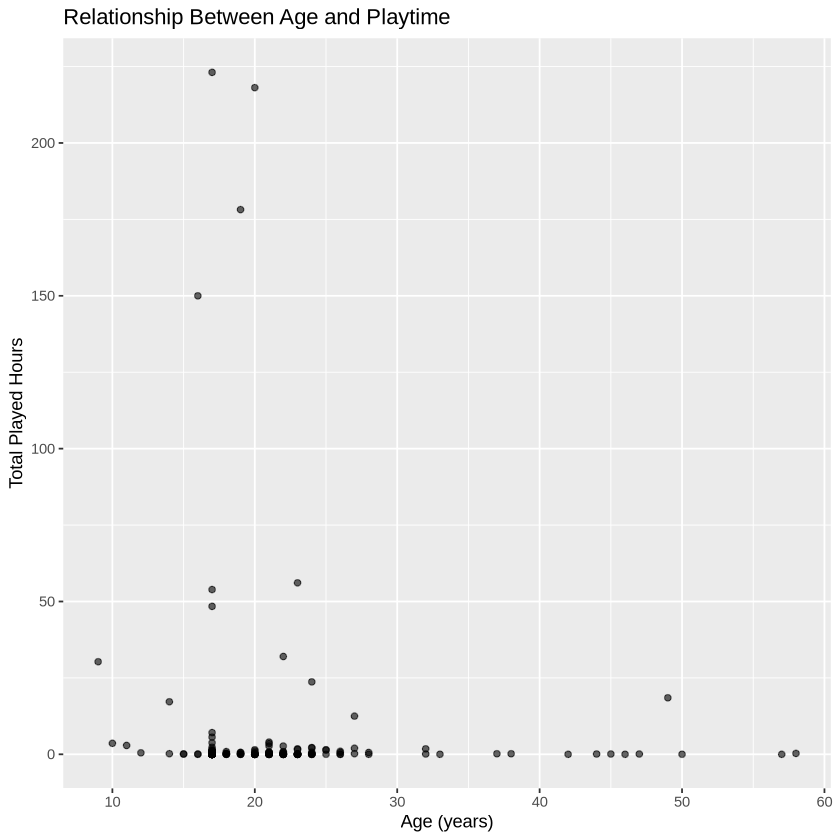

In [11]:
age_plot <- players_wrangled |> 
ggplot( aes(x = age, y = played_hours)) +
  geom_point(alpha = 0.6) +
  labs(
    title = "Relationship Between Age and Playtime",
    x = "Age (years)",
    y = "Total Played Hours")
age_plot